### 导入工具包

In [1]:
import numpy as np
import pandas as pd
import math
import random
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV,learning_curve, ShuffleSplit
from sklearn.metrics import classification_report
# models
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.naive_bayes import GaussianNB
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from keras.wrappers.scikit_learn import KerasClassifier
from time import time
import datetime
import warnings
warnings.filterwarnings("ignore")

绘制混淆矩阵

In [2]:
import itertools
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(cm,c):
    plt.imshow(cm,
               interpolation='nearest',
               cmap=plt.cm.Greens)
    plt.title('confusion matrix')
    plt.colorbar()
    tick_marks=np.arange(len(c))
    plt.xticks(tick_marks,c,rotation=45)
    plt.yticks(tick_marks,c)
    threshold=cm.max()/2
    
    
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],
                horizontalalignment="center",
                color="white" if cm[i,j] > threshold else "gray",
                fontsize=20)
    plt.tight_layout()
    plt.ylabel('true')
    plt.xlabel('predicted')
    plt.show()

绘制lerning_curve

In [3]:
def plot_learning_curve(estimator, title, X, y, ax, ylim=None,cv=None, n_jobs=None):
    #ax 选择子图 ylim 设置纵坐标的取值范围  cv交叉验证   n_jobs设定要使用的线程
    train_sizes, train_scores, test_scores = learning_curve(estimator,X, y, cv=cv,n_jobs=n_jobs)
    
    ax.set_title(title)
    if ylim is not None:
        ax.set_ylim(*ylim)
    ax.set_xlabel("Training examples")
    ax.set_ylabel("Score")
    ax.grid()
    
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    ax.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    ax.plot(train_sizes, test_scores_mean, 'o-', color="b",
                 label="Test score")
    ax.legend(loc="best")
    return ax

### 导入uci心脏病数据集，对数据集先进行探索性数据分析

In [4]:
df=pd.read_csv('processed.cleveland.data')
df

,63.0,1.0,1.0.1,145.0,233.0,1.0.2,2.0,150.0,0.0,2.3,3.0,0.0.1,6.0,0
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
298,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
299,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
300,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [5]:
df.columns=['age','sex','cp', 'trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']

In [6]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
298,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
299,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
300,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


由于"目标"字段是指患者中存在心脏病。它是介于 0（无存在）到 4 之间的整数值。克利夫兰数据库的实验集中在简单地尝试区分存在（值1，2，3，4）和不存在（值0）。所以这里1,2,3,4是代表同样的意思，都是患者患病，实质上这就是一个二分类问题，为了方便后续模型处理，所以这里将num不大于0的都处理成1

In [7]:
df.num[df.num>0] = 1

In [8]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
298,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,1
299,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,1
300,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


数据集有302行，14列，每行表示一个病人，13列表示特征，1列表示标签

In [9]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

可以看到，没有数据缺失值

### 数据探索性分析及数据可视化

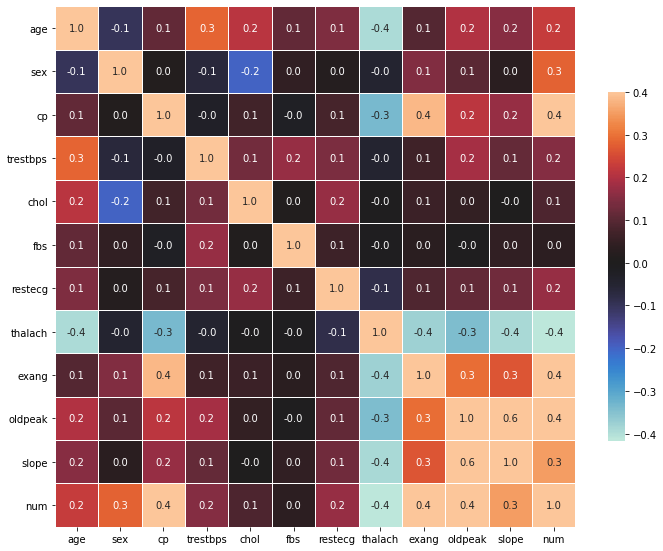

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),vmax=.4,center=0,square=True,linewidth=.6,cbar_kws={"shrink":.5},annot=True,fmt='.1f')
plt.tight_layout()
plt.show()

### 将各列之间两两的散点图绘制出来，可以看到各列之间的关系

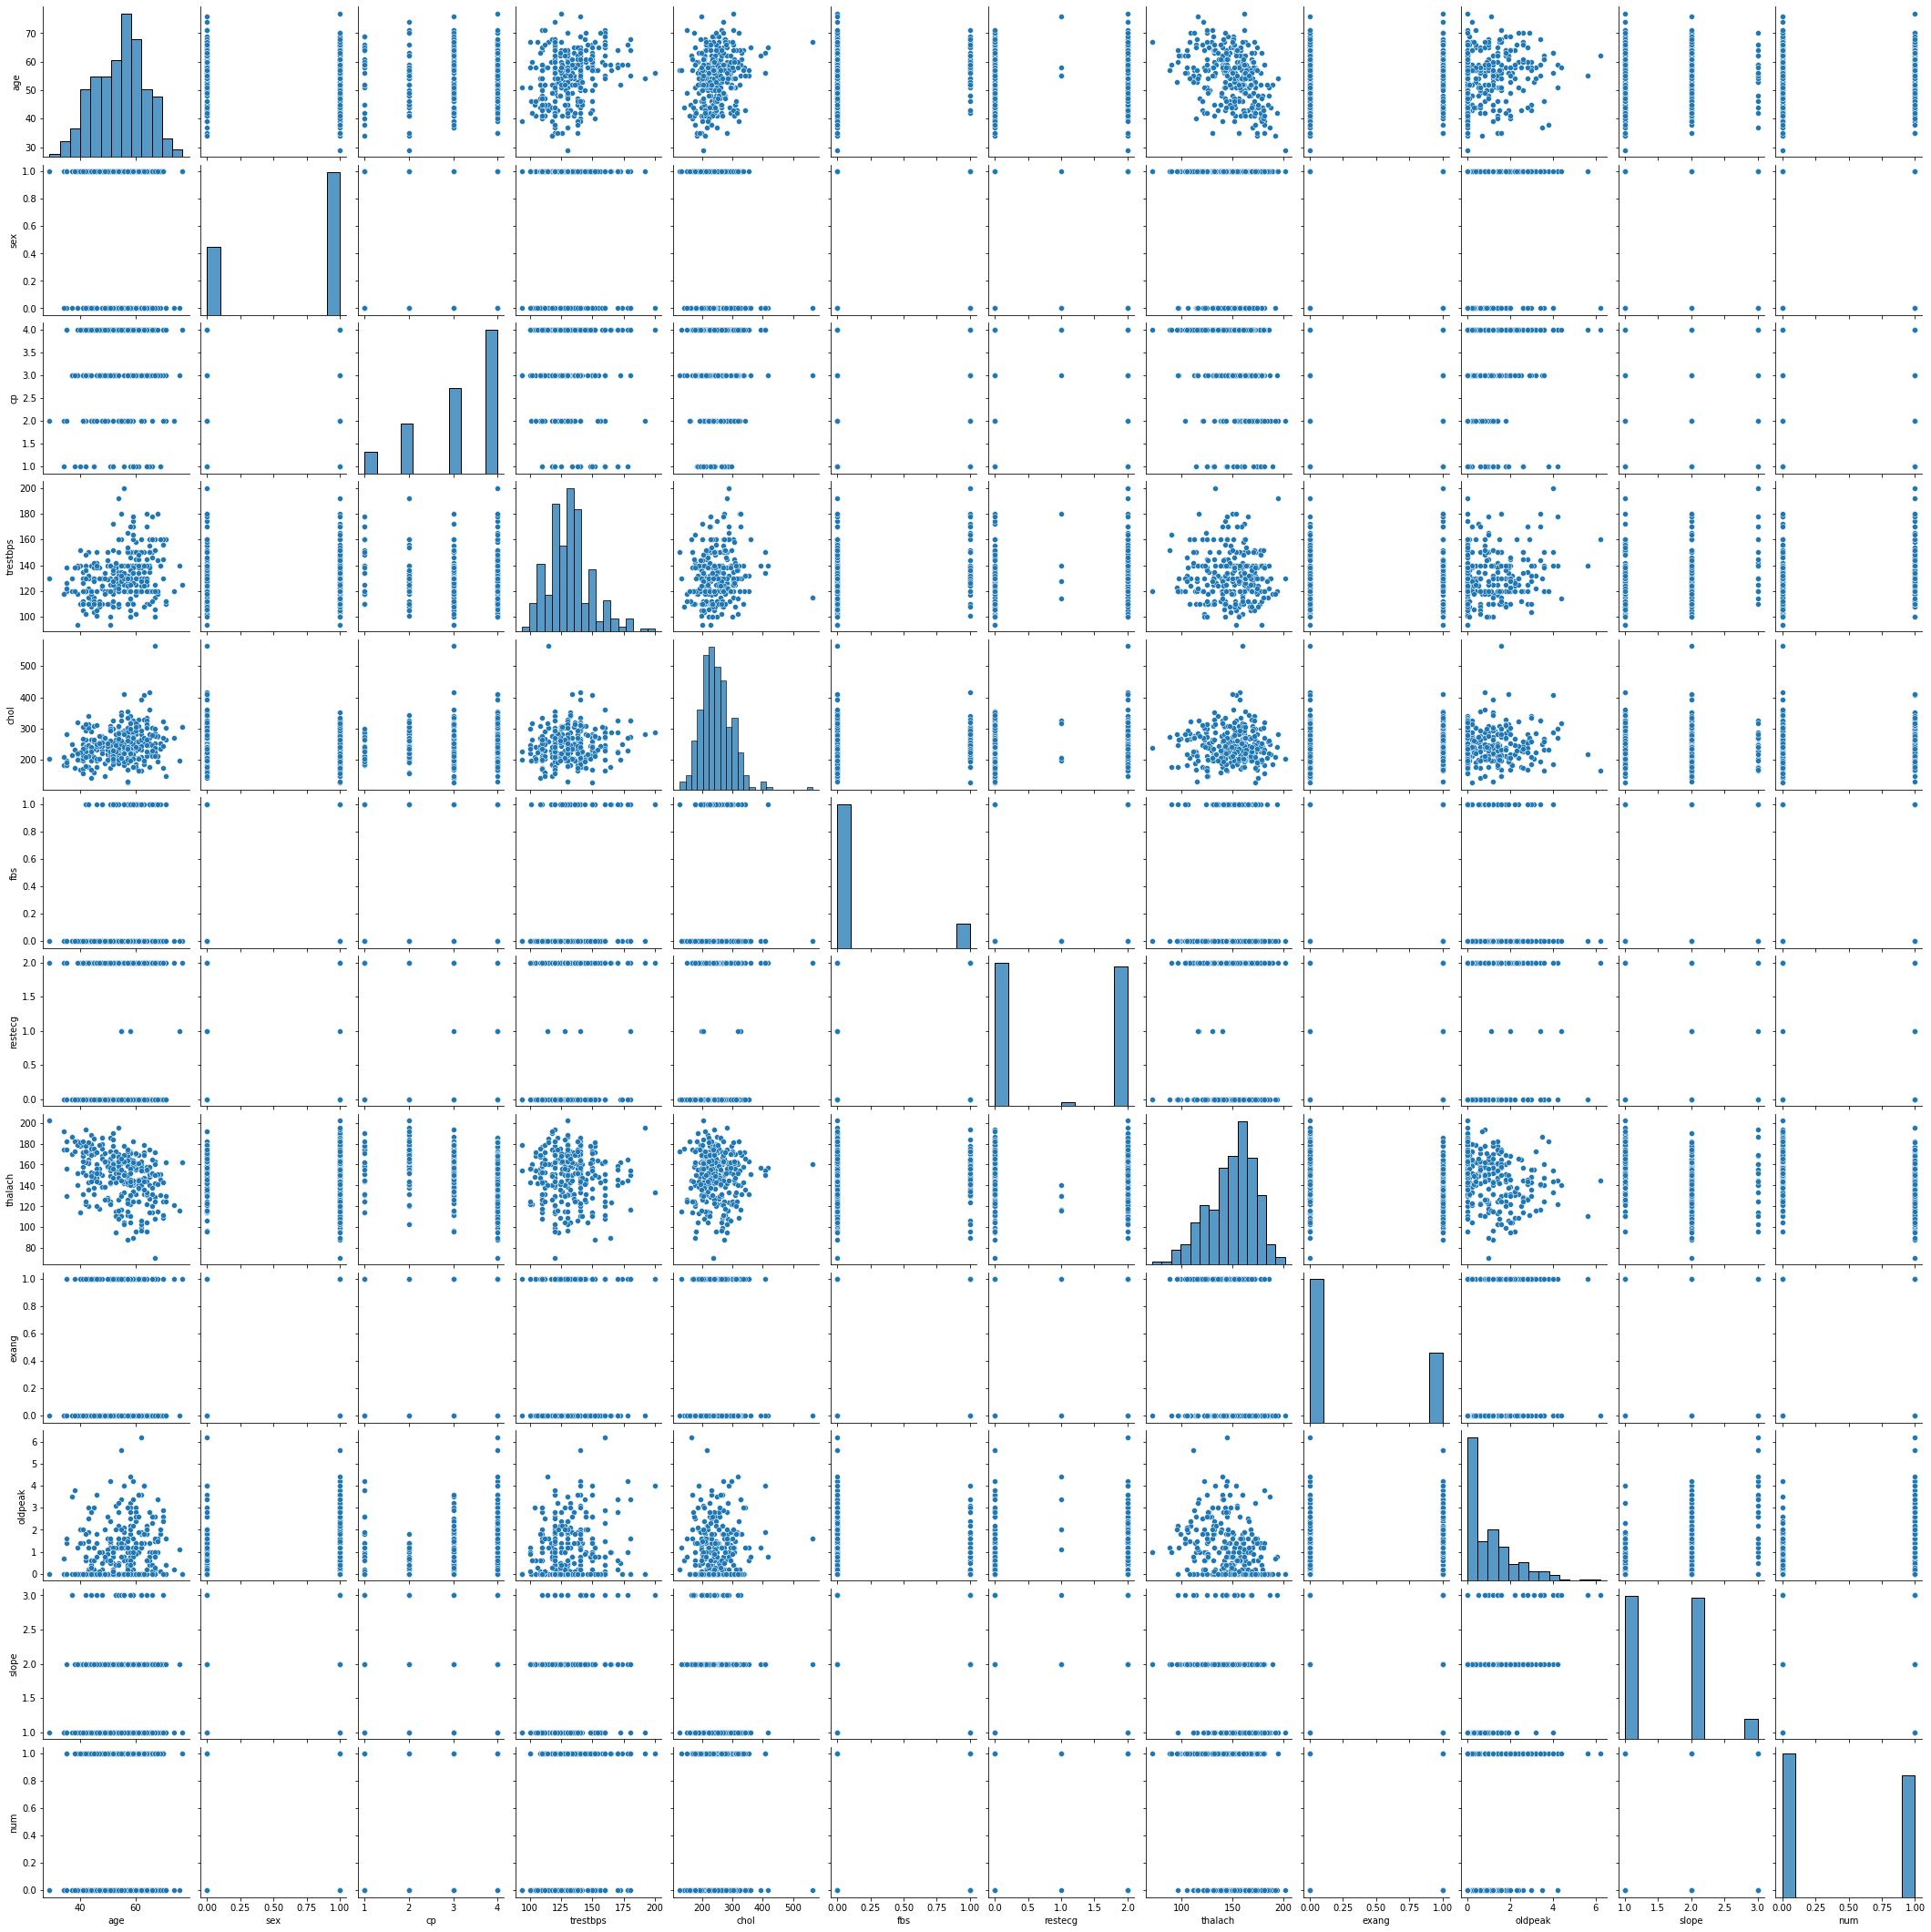

In [11]:
sns.pairplot(df)
plt.show()

### 数据预处理

区分定类 定序 定距 定比四种特征，将定类特征由整数编码转为实际对应的字符串

In [12]:
df['sex'][df['sex']==0]='female'
df['sex'][df['sex']==1]='male'

df['cp'][df['cp']==1]='typical angina'
df['cp'][df['cp']==2]='atypical angina'
df['cp'][df['cp']==3]='non-anginal pain'
df['cp'][df['cp']==4]='asymptomatic'

df['exang'][df['exang']==0]='no'
df['exang'][df['exang']==1]='yes'

df['fbs'][df['fbs']==0]='fasting blood sugar > 120 mg/dl'
df['fbs'][df['fbs']==1]='fasting blood sugar <= 120 mg/dl'

df['restecg'][df['restecg']==0]='normal'
df['restecg'][df['restecg']==1]='having ST-T wave abnormality'
df['restecg'][df['restecg']==2]='showing probable or definite left ventricular hypertrophy by Estes'

df['thal'][df['thal']==3]='normal'
df['thal'][df['thal']==6]='fixed defect'
df['thal'][df['thal']==7]='reversable defect'

In [13]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,67.0,male,asymptomatic,160.0,286.0,fasting blood sugar > 120 mg/dl,showing probable or definite left ventricular ...,108.0,yes,1.5,2.0,3.0,3.0,1
1,67.0,male,asymptomatic,120.0,229.0,fasting blood sugar > 120 mg/dl,showing probable or definite left ventricular ...,129.0,yes,2.6,2.0,2.0,7.0,1
2,37.0,male,non-anginal pain,130.0,250.0,fasting blood sugar > 120 mg/dl,normal,187.0,no,3.5,3.0,0.0,3.0,0
3,41.0,female,atypical angina,130.0,204.0,fasting blood sugar > 120 mg/dl,showing probable or definite left ventricular ...,172.0,no,1.4,1.0,0.0,3.0,0
4,56.0,male,atypical angina,120.0,236.0,fasting blood sugar > 120 mg/dl,normal,178.0,no,0.8,1.0,0.0,3.0,0


在pandas中，离散的定类和定序特征应该是object这样的对象类型，连续的定距和定比特征应该是int64或者是float64这样的浮点数类型

将离散的定类和定序特征转为one-hot独热向量编码

In [14]:
df=pd.get_dummies(df)#自动找到object对应的定类特征，把它变成独热向量编码

In [15]:
df.head()

,age,trestbps,chol,thalach,oldpeak,slope,num,sex_female,sex_male,cp_asymptomatic,...,exang_yes,ca_0.0,ca_1.0,ca_2.0,ca_3.0,ca_?,thal_3.0,thal_6.0,thal_7.0,thal_?
0,67.0,160.0,286.0,108.0,1.5,2.0,1,0,1,1,...,1,0,0,0,1,0,1,0,0,0
1,67.0,120.0,229.0,129.0,2.6,2.0,1,0,1,1,...,1,0,0,1,0,0,0,0,1,0
2,37.0,130.0,250.0,187.0,3.5,3.0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
3,41.0,130.0,204.0,172.0,1.4,1.0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
4,56.0,120.0,236.0,178.0,0.8,1.0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0


In [16]:
df.to_csv('heart_processed.csv',index=False)#不要这个索引0,1,2,3,4，。。。

In [17]:
df=pd.read_csv("heart_processed.csv")

### 划分特征列和标签列

In [18]:
X =df.drop('num',axis=1)

In [19]:
y=df['num']

### 划分训练集合测试集

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

### 归一化

In [97]:
mms = MinMaxScaler().fit(X_train)
X_train=mms.transform(X_train)
X_test=mms.transform(X_test)

In [21]:
y_train

74     0
153    1
64     1
295    1
287    0
      ..
251    0
192    1
117    1
47     0
172    0
Name: num, Length: 241, dtype: int64

In [22]:
cv_train = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

### 1. MLP

首先进行网格搜索，得到最佳超参数

In [67]:
mlp = MLPClassifier()
param_grid = {'hidden_layer_sizes': [i for i in range(1,5)],'solver': ['adam'],'max_iter': [1500]}
mlp = GridSearchCV(mlp, param_grid=param_grid, cv=cv_train, verbose=False)
mlp.fit(X_train, y_train)

GridSearchCV(cv=ShuffleSplit(n_splits=50, random_state=0, test_size=0.2, train_size=None),
             estimator=MLPClassifier(),
             param_grid={'hidden_layer_sizes': [1, 2, 3, 4], 'max_iter': [1500],
                         'solver': ['adam']},
             verbose=False)

In [68]:
mlp.best_estimator_

MLPClassifier(hidden_layer_sizes=4, max_iter=1500)

In [69]:
y_pred_mlp=mlp.best_estimator_.predict(X_test)

In [70]:
confusion_matrix_model_mlp=confusion_matrix(y_test,y_pred_mlp)

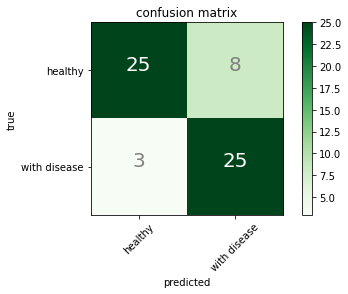

In [71]:
plot_confusion_matrix(confusion_matrix_model_mlp,['healthy','with disease'])

In [72]:
print(classification_report(y_test,y_pred_mlp,target_names=['healthy','with disease']))

              precision    recall  f1-score   support

     healthy       0.89      0.76      0.82        33
with disease       0.76      0.89      0.82        28

    accuracy                           0.82        61
   macro avg       0.83      0.83      0.82        61
weighted avg       0.83      0.82      0.82        61



### 2. AdaBoost Classifier

In [30]:
Ada_Boost = AdaBoostClassifier()
Ada_Boost = GridSearchCV(estimator=Ada_Boost, param_grid={'learning_rate' : [0.095, 0.1, 0.105]}, cv=cv_train, verbose=False)
Ada_Boost.fit(X_train, y_train)

GridSearchCV(cv=ShuffleSplit(n_splits=50, random_state=0, test_size=0.2, train_size=None),
             estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.095, 0.1, 0.101, 0.102, 0.105]},
             verbose=False)

In [31]:
Ada_Boost.best_estimator_

AdaBoostClassifier(learning_rate=0.095)

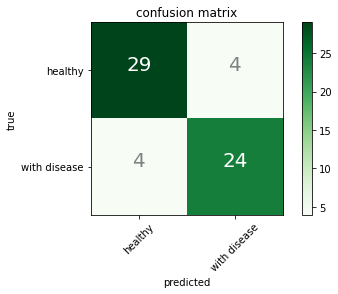

In [32]:
y_pred_ada=Ada_Boost.best_estimator_.predict(X_test)
confusion_matrix_model_ada=confusion_matrix(y_test,y_pred_ada)
plot_confusion_matrix(confusion_matrix_model_ada,['healthy','with disease'])

In [33]:
print(classification_report(y_test,y_pred_ada,target_names=['healthy','with disease']))

              precision    recall  f1-score   support

     healthy       0.88      0.88      0.88        33
with disease       0.86      0.86      0.86        28

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



### 3. KNN

In [34]:
knn = KNeighborsClassifier()
knn = GridSearchCV(estimator=knn, param_grid={'n_neighbors': range(2, 7)}, 
                      cv=cv_train, verbose=False).fit(X_train, y_train)

In [35]:
knn.best_estimator_

KNeighborsClassifier()

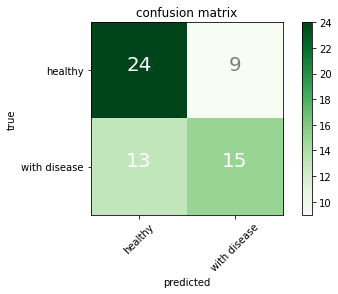

In [36]:
y_pred_knn=knn.best_estimator_.predict(X_test)
confusion_matrix_model_knn=confusion_matrix(y_test,y_pred_knn)
plot_confusion_matrix(confusion_matrix_model_knn,['healthy','with disease'])

In [37]:
print(classification_report(y_test,y_pred_knn,target_names=['healthy','with disease']))

              precision    recall  f1-score   support

     healthy       0.65      0.73      0.69        33
with disease       0.62      0.54      0.58        28

    accuracy                           0.64        61
   macro avg       0.64      0.63      0.63        61
weighted avg       0.64      0.64      0.64        61



### 4. 朴素贝叶斯

In [38]:
gaussian = GaussianNB()
param_grid={'var_smoothing': [1e-4, 1e-5, 1e-6]}
gaussian = GridSearchCV(estimator=gaussian, param_grid=param_grid, cv=cv_train, verbose=False)
gaussian.fit(X_train, y_train)

GridSearchCV(cv=ShuffleSplit(n_splits=50, random_state=0, test_size=0.2, train_size=None),
             estimator=GaussianNB(),
             param_grid={'var_smoothing': [0.0001, 1e-05, 1e-06]},
             verbose=False)

In [39]:
gaussian.best_estimator_

GaussianNB(var_smoothing=0.0001)

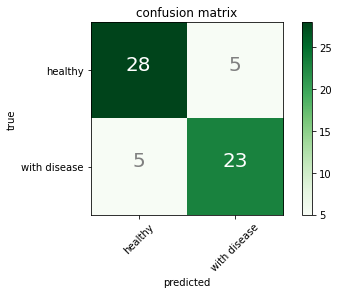

In [40]:
y_pred_gau=gaussian.best_estimator_.predict(X_test)
confusion_matrix_model_gau=confusion_matrix(y_test,y_pred_gau)
plot_confusion_matrix(confusion_matrix_model_gau,['healthy','with disease'])

In [41]:
print(classification_report(y_test,y_pred_gau,target_names=['healthy','with disease']))

              precision    recall  f1-score   support

     healthy       0.85      0.85      0.85        33
with disease       0.82      0.82      0.82        28

    accuracy                           0.84        61
   macro avg       0.83      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



### 5. NN

In [42]:
def build_nn(optimizer='adam'):
    nn = Sequential()
    nn.add(Dense(units=128, kernel_initializer='he_normal', activation='relu', input_shape=(len(X.columns),)))
    nn.add(Dense(units=1, kernel_initializer='he_normal', activation='sigmoid'))
    nn.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return nn
nn_model = build_nn(optimizers.Adam(lr=0.0002))
history=nn_model.fit(X_train, y_train, batch_size=16, epochs=90, validation_data=(X_test, y_test))

Epoch 1/90
16/16 [==============================] - 12s 39ms/step - loss: 68.4365 - accuracy: 0.5158 - val_loss: 66.5932 - val_accuracy: 0.4590
Epoch 2/90
16/16 [==============================] - 0s 2ms/step - loss: 57.4184 - accuracy: 0.5180 - val_loss: 54.3389 - val_accuracy: 0.4590
Epoch 3/90
16/16 [==============================] - 0s 3ms/step - loss: 56.7899 - accuracy: 0.4156 - val_loss: 42.4322 - val_accuracy: 0.4590
Epoch 4/90
16/16 [==============================] - 0s 4ms/step - loss: 41.5641 - accuracy: 0.4429 - val_loss: 30.2897 - val_accuracy: 0.4590
Epoch 5/90
16/16 [==============================] - 0s 3ms/step - loss: 26.9278 - accuracy: 0.4614 - val_loss: 17.6488 - val_accuracy: 0.4590
Epoch 6/90
16/16 [==============================] - 0s 3ms/step - loss: 14.1208 - accuracy: 0.4573 - val_loss: 4.7822 - val_accuracy: 0.3770
Epoch 7/90
16/16 [==============================] - 0s 2ms/step - loss: 3.7123 - accuracy: 0.4019 - val_loss: 3.4774 - val_accuracy: 0.4262
Epoch 8

In [43]:
y_pred_nn=nn_model.predict(X_test)

In [44]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(y_test,y_pred_nn)

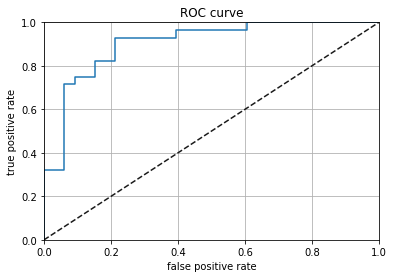

In [45]:
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],ls="--",c=".1")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title('ROC curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.grid(True)

In [46]:
auc(fpr,tpr)

0.9036796536796537

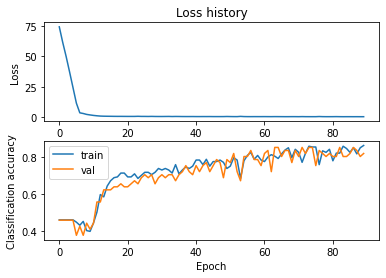

In [47]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(history.history['loss'])
plt.title('Loss history')
# plt.xlabel('epoch')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
# plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend()
plt.show()

### 6.随机森林

In [48]:
from sklearn.ensemble import RandomForestClassifier
model_forest=RandomForestClassifier(max_depth=6,n_estimators=110,random_state=5)#最大树深100，随机种子5，用100颗决策树进行集成
model_forest.fit(X_train,y_train)

RandomForestClassifier(max_depth=6, n_estimators=110, random_state=5)

In [49]:
y_pred=model_forest.predict(X_test)

In [50]:
confusion_matrix_model=confusion_matrix(y_test,y_pred)

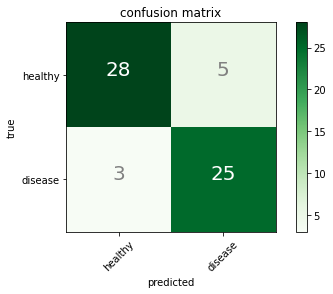

In [51]:
plot_confusion_matrix(confusion_matrix_model,['healthy','disease'])

3这个就比较严重了，本来有病但预测为健康，这个数值应该越小越好，但是9影响不大，只要再去做个检查就好了


In [93]:
print(classification_report(y_test,y_pred,target_names=['healthy','with disease']))

              precision    recall  f1-score   support

     healthy       0.90      0.85      0.88        33
with disease       0.83      0.89      0.86        28

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [52]:
y_pred_q=model_forest.predict_proba(X_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_q)

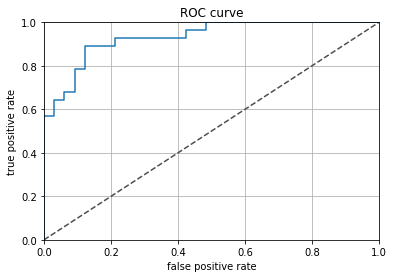

In [53]:
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],ls="--",c=".3")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title('ROC curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.grid(True)

In [54]:
auc(fpr,tpr)

0.9329004329004329

### 7.SVM

In [91]:
svm = SVC()
param_grid={'gamma': [0.00005, 0.0002, 0.0001,0.0005,0.0008,0.1]}
svm = GridSearchCV(estimator=svm, param_grid=param_grid, cv=cv_train, verbose=True)
svm.fit(X_train, y_train)
print(svm.best_params_)

Fitting 50 folds for each of 6 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'gamma': 0.0001}


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    1.7s finished


In [95]:
svm.best_estimator_

SVC(gamma=0.0001)

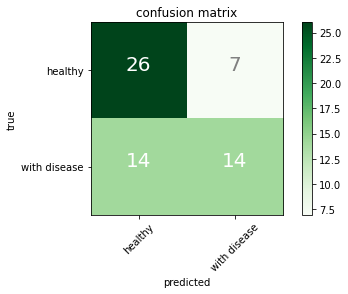

In [92]:
y_pred_svm=svm.best_estimator_.predict(X_test)
confusion_matrix_model_svm=confusion_matrix(y_test,y_pred_svm)
plot_confusion_matrix(confusion_matrix_model_svm,['healthy','with disease'])

In [88]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_svm,target_names=['healthy','with disease']))

              precision    recall  f1-score   support

     healthy       0.65      0.79      0.71        33
with disease       0.67      0.50      0.57        28

    accuracy                           0.66        61
   macro avg       0.66      0.64      0.64        61
weighted avg       0.66      0.66      0.65        61



In [89]:
title=["mlp","adaboost","knn","naive bayes","random forest","svm(rbf)"]
model=[mlp.best_estimator_, Ada_Boost.best_estimator_,knn.best_estimator_,gaussian.best_estimator_,model_forest,svm.best_estimator_]

mlp用时:00:18:013573s
adaboost用时:00:06:187602s
knn用时:00:01:113120s
naive bayes用时:00:00:650259s
random forest用时:00:10:567751s
svm(rbf)用时:00:00:692116s


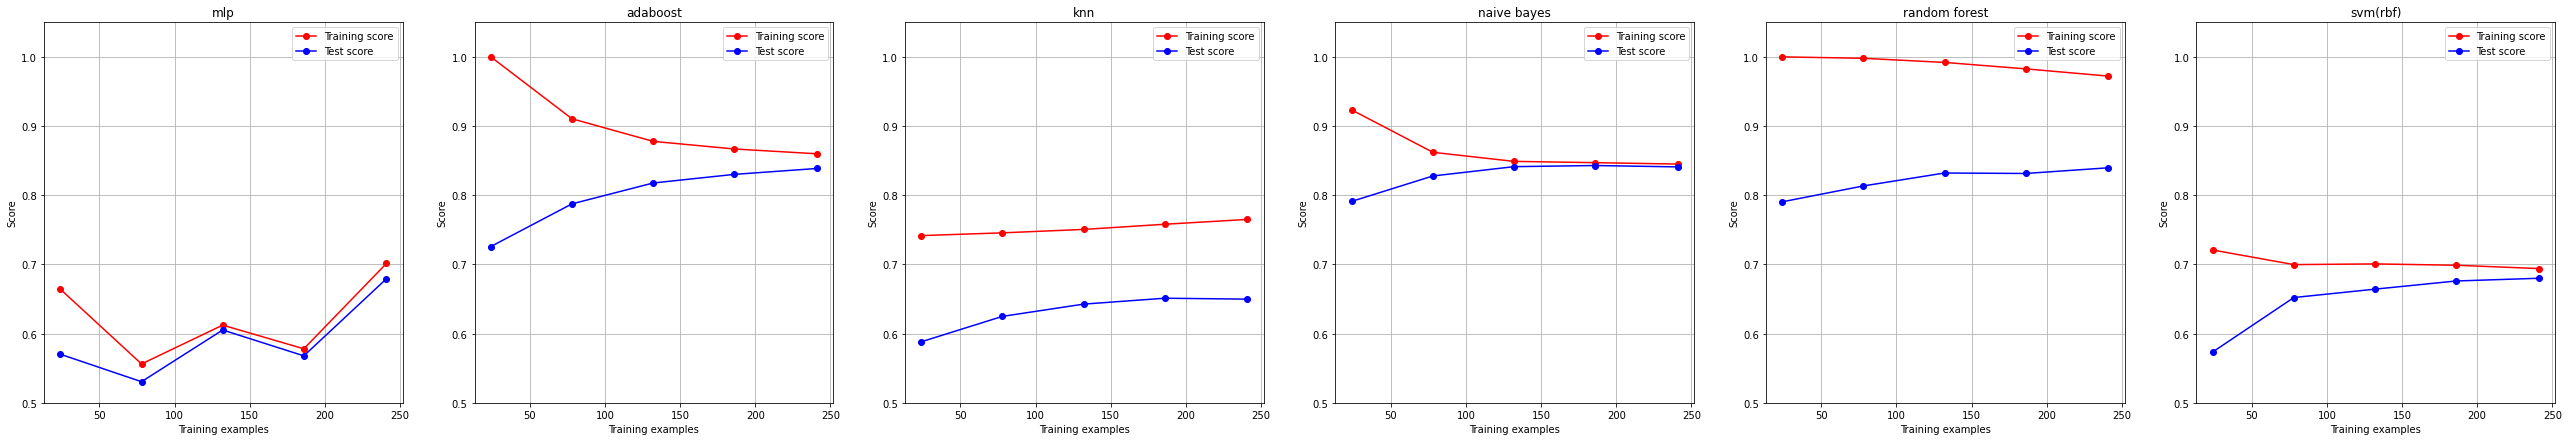

In [90]:
fig, axes=plt.subplots(1,6,figsize=(45,7))
for ind, title_, estimator in zip(range(len(title)),title,model):
    times = time()
    plot_learning_curve(estimator, title_, X, y, ax=axes[ind], ylim=[0.5,1.05],n_jobs=6,cv=cv_train)
    print("{}用时:{}s".format(title_,datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f")))
plt.show()

可以看到，在运行时间上，naive bayes用时最短，其次是svm(rbf)，knn，adaboost和random forest用时比较短，最长的是mlp
朴素贝叶斯可以在很少的样本上获得不错的结果，不仅用时比较短，而且在learning curve中的表现也还不错。朴素贝叶斯计算速度远远胜过svm，random forest这样复杂的模型。朴素贝叶斯的分类效果其实不如其他分类器，贝叶斯天生学习能力比较弱。随着训练样本量的逐渐增大，贝叶斯和adaboost的训练准确率却逐渐下降，这证明样本量越大，贝叶斯需要学习的东西越多，对训练集的拟合程度也越来越差，反而比较少量的样本可以让贝叶斯还有较高的训练准确率。

再来看过拟合的问题，首先可以观察到，所有模型在样本量很少的时候都是处于过拟合的状态，即在训练集上表现好，测试集上表现糟糕，但随着样本的逐渐增多，过拟合问题就逐渐消失了，不过每个模型的处理手段不同。比较强大的分类器，如svm，random forest是依靠快速升高模型在测试集上的表现来减轻过拟合问题，朴素贝叶斯不同，是依赖训练集上的准确率下降，测试集上的准确率上升来解决过拟合的问题。

接下来，再看每个算法在测试集上的拟合结果，即泛化误差的大小，随着训练样本数量的上升，所有模型的测试表现都上升了，但svm，knn，mlp在测试集上的表现远远不如adaboost，naive bayes和random forest。